In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier  # Use RandomForestRegressor for regression tasks
from sklearn.model_selection import train_test_split

In [51]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
data = pd.read_csv('/content/drive/MyDrive/certificates.csv')

<ipython-input-52-d0d1f4d2c3c1>:1: DtypeWarning: Columns (15,34) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/certificates.csv')


In [53]:
data.head()

,LMK_KEY,ADDRESS1,ADDRESS2,ADDRESS3,POSTCODE,BUILDING_REFERENCE_NUMBER,CURRENT_ENERGY_RATING,POTENTIAL_ENERGY_RATING,CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,...,LOCAL_AUTHORITY_LABEL,CONSTITUENCY_LABEL,POSTTOWN,CONSTRUCTION_AGE_BAND,LODGEMENT_DATETIME,TENURE,FIXED_LIGHTING_OUTLETS_COUNT,LOW_ENERGY_FIXED_LIGHT_COUNT,UPRN,UPRN_SOURCE
0,363846102022020051116205147588790,"3, Roundwood Road",NaN,NaN,HP6 6NA,9424047668,C,C,75,75,...,Buckinghamshire,Chesham and Amersham,AMERSHAM,England and Wales: 1950-1966,2020-05-11 16:20:51,rental (social),NaN,NaN,1.000805e+11,Address Matched
1,1803544716032020061615324758978903,"157, Vine Road",Stoke Poges,NaN,SL2 4DH,1338940778,D,C,57,76,...,Buckinghamshire,Beaconsfield,SLOUGH,England and Wales: 1950-1966,2020-06-16 15:32:47,owner-occupied,NaN,NaN,1.000805e+11,Address Matched
2,2b3d6ba58c491595da25c3672a70fe1b83430f2d6fb2e6...,42 Sycamore Road,NaN,NaN,HP12 4TL,10001515203,C,B,71,87,...,Buckinghamshire,Wycombe,HIGH WYCOMBE,England and Wales: 1967-1975,2021-09-01 09:31:38,Owner-occupied,13.0,NaN,1.000806e+11,Energy Assessor
3,2b3cffa2899d6e8873314bab12e4a4264fbe514d85b0a1...,12 Somerset Way,NaN,NaN,SL0 9AF,10001350864,E,C,50,71,...,Buckinghamshire,Beaconsfield,IVER,England and Wales: 1930-1949,2021-09-19 22:53:03,Owner-occupied,29.0,NaN,1.000805e+11,Energy Assessor
4,2b3fa69a8f1d5fd13be85914fb2aee4752ba91dc981e6d...,462 Waterside,NaN,NaN,HP5 1QF,10001532261,C,C,70,78,...,Buckinghamshire,Chesham and Amersham,CHESHAM,England and Wales: 1976-1982,2021-08-19 16:42:01,Rented (social),6.0,NaN,1.000805e+11,Energy Assessor


In [54]:
data.shape

(64698, 92)

Target column is ENERGY_CONSUMPTION_CURRENT

MemoryError: Unable to allocate 321. MiB for an array with shape (64698, 5198) and data type bool

In [55]:
data.dtypes

,0
LMK_KEY,object
ADDRESS1,object
ADDRESS2,object
ADDRESS3,object
POSTCODE,object
...,...
TENURE,object
FIXED_LIGHTING_OUTLETS_COUNT,float64
LOW_ENERGY_FIXED_LIGHT_COUNT,float64
UPRN,float64


In [56]:
# Select non-numerical columns
non_numerical_columns = data.select_dtypes(exclude=['number']).columns

# Print the non-numerical columns
print(non_numerical_columns)

Index(['LMK_KEY', 'ADDRESS1', 'ADDRESS2', 'ADDRESS3', 'POSTCODE',
       'CURRENT_ENERGY_RATING', 'POTENTIAL_ENERGY_RATING', 'PROPERTY_TYPE',
       'BUILT_FORM', 'INSPECTION_DATE', 'LOCAL_AUTHORITY', 'CONSTITUENCY',
       'COUNTY', 'LODGEMENT_DATE', 'TRANSACTION_TYPE', 'ENERGY_TARIFF',
       'MAINS_GAS_FLAG', 'FLOOR_LEVEL', 'FLAT_TOP_STOREY', 'GLAZED_TYPE',
       'GLAZED_AREA', 'HOTWATER_DESCRIPTION', 'HOT_WATER_ENERGY_EFF',
       'HOT_WATER_ENV_EFF', 'FLOOR_DESCRIPTION', 'FLOOR_ENERGY_EFF',
       'FLOOR_ENV_EFF', 'WINDOWS_DESCRIPTION', 'WINDOWS_ENERGY_EFF',
       'WINDOWS_ENV_EFF', 'WALLS_DESCRIPTION', 'WALLS_ENERGY_EFF',
       'WALLS_ENV_EFF', 'SECONDHEAT_DESCRIPTION', 'ROOF_DESCRIPTION',
       'ROOF_ENERGY_EFF', 'ROOF_ENV_EFF', 'MAINHEAT_DESCRIPTION',
       'MAINHEAT_ENERGY_EFF', 'MAINHEAT_ENV_EFF', 'MAINHEATCONT_DESCRIPTION',
       'MAINHEATC_ENERGY_EFF', 'MAINHEATC_ENV_EFF', 'LIGHTING_DESCRIPTION',
       'LIGHTING_ENERGY_EFF', 'LIGHTING_ENV_EFF', 'MAIN_FUEL',
       'H

Some of these columns are far unnecessary like location, unique ID and dates etc. So I am removing them.


In [57]:
columns_to_remove = ['LMK_KEY', 'ADDRESS1', 'ADDRESS2', 'ADDRESS3', 'POSTCODE','BUILDING_REFERENCE_NUMBER', 'INSPECTION_DATE','LOCAL_AUTHORITY',
                     'CONSTITUENCY', 'COUNTY', 'LODGEMENT_DATE', 'GLAZED_TYPE', 'GLAZED_AREA','ROOF_DESCRIPTION','ADDRESS', 'LOCAL_AUTHORITY_LABEL',
                     'CONSTITUENCY_LABEL', 'POSTTOWN', 'CONSTRUCTION_AGE_BAND',
                     'LODGEMENT_DATETIME','UPRN', 'UPRN_SOURCE']

In [58]:
# Drop the specified columns from the DataFrame
data = data.drop(columns=columns_to_remove)

In [59]:
data.head()

,CURRENT_ENERGY_RATING,POTENTIAL_ENERGY_RATING,CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,PROPERTY_TYPE,BUILT_FORM,TRANSACTION_TYPE,ENVIRONMENT_IMPACT_CURRENT,ENVIRONMENT_IMPACT_POTENTIAL,ENERGY_CONSUMPTION_CURRENT,...,WIND_TURBINE_COUNT,HEAT_LOSS_CORRIDOR,UNHEATED_CORRIDOR_LENGTH,FLOOR_HEIGHT,PHOTO_SUPPLY,SOLAR_WATER_HEATING_FLAG,MECHANICAL_VENTILATION,TENURE,FIXED_LIGHTING_OUTLETS_COUNT,LOW_ENERGY_FIXED_LIGHT_COUNT
0,C,C,75,75,Flat,End-Terrace,rental (social),75,75,178,...,0.0,no corridor,NaN,NaN,NaN,N,natural,rental (social),NaN,NaN
1,D,C,57,76,Maisonette,Semi-Detached,marketed sale,51,77,331,...,0.0,unheated corridor,8.0,NaN,NaN,N,natural,owner-occupied,NaN,NaN
2,C,B,71,87,House,Mid-Terrace,marketed sale,67,86,201,...,0.0,NaN,NaN,2.24,0.0,N,natural,Owner-occupied,13.0,NaN
3,E,C,50,71,House,Detached,marketed sale,44,65,284,...,0.0,NaN,NaN,2.37,0.0,N,natural,Owner-occupied,29.0,NaN
4,C,C,70,78,Flat,Detached,rental,68,78,217,...,0.0,no corridor,NaN,2.33,0.0,N,natural,Rented (social),6.0,NaN


In [60]:
# Inspect categorical columns and their unique values
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    print(f"Column: {col} - Unique Values: {data[col].nunique()}")

Column: CURRENT_ENERGY_RATING - Unique Values: 7
Column: POTENTIAL_ENERGY_RATING - Unique Values: 7
Column: PROPERTY_TYPE - Unique Values: 5
Column: BUILT_FORM - Unique Values: 7
Column: TRANSACTION_TYPE - Unique Values: 17
Column: ENERGY_TARIFF - Unique Values: 11
Column: MAINS_GAS_FLAG - Unique Values: 2
Column: FLOOR_LEVEL - Unique Values: 32
Column: FLAT_TOP_STOREY - Unique Values: 2
Column: HOTWATER_DESCRIPTION - Unique Values: 43
Column: HOT_WATER_ENERGY_EFF - Unique Values: 5
Column: HOT_WATER_ENV_EFF - Unique Values: 5
Column: FLOOR_DESCRIPTION - Unique Values: 105
Column: FLOOR_ENERGY_EFF - Unique Values: 6
Column: FLOOR_ENV_EFF - Unique Values: 5
Column: WINDOWS_DESCRIPTION - Unique Values: 17
Column: WINDOWS_ENERGY_EFF - Unique Values: 5
Column: WINDOWS_ENV_EFF - Unique Values: 5
Column: WALLS_DESCRIPTION - Unique Values: 141
Column: WALLS_ENERGY_EFF - Unique Values: 5
Column: WALLS_ENV_EFF - Unique Values: 5
Column: SECONDHEAT_DESCRIPTION - Unique Values: 15
Column: ROOF_EN

Columns with too many unique values (e.g., free-form text, long identifiers) might be less useful for encoding because encoding them could lead to a high-dimensional feature space, which can hurt model performance. You can filter out columns with too many unique values by setting a threshold for cardinality:

In [61]:
# Filter categorical columns with too many unique values (e.g., more than 20)
high_cardinality_cols = [col for col in categorical_columns if data[col].nunique() > 20]
print(f"High Cardinality Columns: {high_cardinality_cols}")

High Cardinality Columns: ['FLOOR_LEVEL', 'HOTWATER_DESCRIPTION', 'FLOOR_DESCRIPTION', 'WALLS_DESCRIPTION', 'MAINHEAT_DESCRIPTION', 'MAINHEATCONT_DESCRIPTION', 'LIGHTING_DESCRIPTION', 'MAIN_FUEL']


In [62]:
data = data.drop(columns=high_cardinality_cols)

For categorical features with many levels, you can group the less frequent categories into an "Other" or "Unknown" category.

For example, if a column like PROPERTY_TYPE has categories like "detached", "semi-detached", "apartment", etc., but a few categories have very few entries, you could merge those into a single "Other" category.

In [64]:
# Group categories with fewer than a threshold number of occurrences
threshold = 10  # Set the threshold based on your data

# Get categorical columns present in the current DataFrame
categorical_columns_present = data.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns_present:  # Iterate through columns present in the DataFrame
    value_counts = data[col].value_counts()
    low_frequency_values = value_counts[value_counts < threshold].index
    data[col] = data[col].replace(low_frequency_values, 'Other')

3. Use Label Encoding for High Cardinality Features
For categorical columns with high cardinality, instead of applying OneHotEncoding, you can apply Label Encoding (i.e., assigning each category a unique integer). This works well for ordinal categorical features (where the categories have a meaningful order), but it can also be useful for reducing dimensionality

In [67]:
from sklearn.preprocessing import LabelEncoder

# Get categorical columns present in the current DataFrame
categorical_columns_present = data.select_dtypes(include=['object', 'category']).columns

label_encoder = LabelEncoder()
for col in categorical_columns_present:  # Use updated categorical columns
    if data[col].nunique() <= 20:  # Only apply to columns with fewer unique values
        data[col] = label_encoder.fit_transform(data[col])

Apply Target Encoding (Mean Encoding)
For some categorical columns, you can apply target encoding (also known as mean encoding). This involves replacing each category with the mean value of the target variable (energy consumption, in your case). This reduces the dimensionality by turning a categorical variable into a single numerical feature.

In [70]:
# Apply target encoding (mean encoding) to categorical columns
# Get the current categorical columns
categorical_columns_present = data.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns_present:  # Iterate through the updated columns
    if data[col].nunique() <= 20:  # Only apply to columns with fewer unique values
        mean_encoded = data.groupby(col)['ENERGY_CONSUMPTION_CURRENT'].mean()
        data[col] = data[col].map(mean_encoded)

5. Feature Importance with RandomForest (For Selection)
Once you've reduced the dimensions by dropping or encoding categorical features, you can use RandomForest to calculate feature importance. This will help you identify which features (both numerical and categorical) are most important for predicting the target variable.

In [71]:
# Split the data into features and target
X = data.drop(columns=['ENERGY_CONSUMPTION_CURRENT'])  # Replace with your target column name
y = data['ENERGY_CONSUMPTION_CURRENT']

# Identify numeric columns
numeric_columns = X.select_dtypes(include=['number']).columns

# Keep only numeric columns
X = X[numeric_columns]

In [81]:
from sklearn.ensemble import RandomForestRegressor
# Train RandomForest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance
feature_importance = rf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Show the top important features
print(feature_importance_df.head(30))

                          Feature  Importance
11  CO2_EMISS_CURR_PER_FLOOR_AREA    0.642973
9    ENERGY_CONSUMPTION_POTENTIAL    0.214489
10          CO2_EMISSIONS_CURRENT    0.050086
12        CO2_EMISSIONS_POTENTIAL    0.033499
8    ENVIRONMENT_IMPACT_POTENTIAL    0.027758
46               MAINHEAT_ENV_EFF    0.010454
45            MAINHEAT_ENERGY_EFF    0.003067
2       CURRENT_ENERGY_EFFICIENCY    0.002107
21                 MAINS_GAS_FLAG    0.001493
13          LIGHTING_COST_CURRENT    0.001462
19               TOTAL_FLOOR_AREA    0.001448
32              HOT_WATER_ENV_EFF    0.001331
54                   FLOOR_HEIGHT    0.001047
40         SECONDHEAT_DESCRIPTION    0.000805
0           CURRENT_ENERGY_RATING    0.000725
3     POTENTIAL_ENERGY_EFFICIENCY    0.000635
17         HOT_WATER_COST_CURRENT    0.000579
6                TRANSACTION_TYPE    0.000374
7      ENVIRONMENT_IMPACT_CURRENT    0.000368
47           MAINHEATC_ENERGY_EFF    0.000364
44                   ROOF_ENV_EFF 

In [92]:
# List of top 15 important features (based on previous steps)
top_features = [
    'CO2_EMISS_CURR_PER_FLOOR_AREA', 'ENERGY_CONSUMPTION_POTENTIAL',
    'CO2_EMISSIONS_CURRENT', 'CO2_EMISSIONS_POTENTIAL', 'ENVIRONMENT_IMPACT_POTENTIAL',
    'MAINHEAT_ENV_EFF', 'MAINHEAT_ENERGY_EFF', 'CURRENT_ENERGY_EFFICIENCY',
    'MAINS_GAS_FLAG', 'LIGHTING_COST_CURRENT',
    'TOTAL_FLOOR_AREA', 'HOT_WATER_ENV_EFF',
    'FLOOR_HEIGHT', 'SECONDHEAT_DESCRIPTION', 'CURRENT_ENERGY_RATING',
    'POTENTIAL_ENERGY_EFFICIENCY', 'HOT_WATER_COST_CURRENT',
    'ENERGY_CONSUMPTION_CURRENT'
]

# Select only the top 15 important columns in your data
data_reduced = data[top_features]

# Verify the reduced dataset
print("Shape of reduced dataset:", data_reduced.shape)
print("Columns in reduced dataset:", data_reduced.columns)

Shape of reduced dataset: (64698, 18)
Columns in reduced dataset: Index(['CO2_EMISS_CURR_PER_FLOOR_AREA', 'ENERGY_CONSUMPTION_POTENTIAL',
       'CO2_EMISSIONS_CURRENT', 'CO2_EMISSIONS_POTENTIAL',
       'ENVIRONMENT_IMPACT_POTENTIAL', 'MAINHEAT_ENV_EFF',
       'MAINHEAT_ENERGY_EFF', 'CURRENT_ENERGY_EFFICIENCY', 'MAINS_GAS_FLAG',
       'LIGHTING_COST_CURRENT', 'TOTAL_FLOOR_AREA', 'HOT_WATER_ENV_EFF',
       'FLOOR_HEIGHT', 'SECONDHEAT_DESCRIPTION', 'CURRENT_ENERGY_RATING',
       'POTENTIAL_ENERGY_EFFICIENCY', 'HOT_WATER_COST_CURRENT',
       'ENERGY_CONSUMPTION_CURRENT'],
      dtype='object')


In [93]:
data_reduced.head()

,CO2_EMISS_CURR_PER_FLOOR_AREA,ENERGY_CONSUMPTION_POTENTIAL,CO2_EMISSIONS_CURRENT,CO2_EMISSIONS_POTENTIAL,ENVIRONMENT_IMPACT_POTENTIAL,MAINHEAT_ENV_EFF,MAINHEAT_ENERGY_EFF,CURRENT_ENERGY_EFFICIENCY,MAINS_GAS_FLAG,LIGHTING_COST_CURRENT,TOTAL_FLOOR_AREA,HOT_WATER_ENV_EFF,FLOOR_HEIGHT,SECONDHEAT_DESCRIPTION,CURRENT_ENERGY_RATING,POTENTIAL_ENERGY_EFFICIENCY,HOT_WATER_COST_CURRENT,ENERGY_CONSUMPTION_CURRENT
0,31,178,1.9,1.9,75,1,1,75,222.280005,58,62.0,1,NaN,13,187.854947,75,80,178
1,58,154,4.0,1.9,77,1,1,57,222.280005,87,69.0,2,NaN,13,267.836065,76,369,331
2,35,78,3.1,1.2,86,1,1,71,222.280005,71,87.0,1,2.24,13,187.854947,87,142,201
3,50,160,9.2,5.2,65,1,1,50,222.280005,181,185.0,1,2.37,7,362.367971,71,137,284
4,38,148,2.9,2.0,78,1,1,70,222.280005,65,75.0,1,2.33,13,187.854947,78,166,217


Feature selection: Based on the importance scores, you could apply feature selection techniques (e.g., SelectFromModel in scikit-learn) to automatically discard features with low importance.

In [14]:
data_types = [data.dtypes]
print(data_types)

[CURRENT_ENERGY_RATING            object
POTENTIAL_ENERGY_RATING          object
CURRENT_ENERGY_EFFICIENCY         int64
POTENTIAL_ENERGY_EFFICIENCY       int64
PROPERTY_TYPE                    object
                                 ...   
SOLAR_WATER_HEATING_FLAG         object
MECHANICAL_VENTILATION           object
TENURE                           object
FIXED_LIGHTING_OUTLETS_COUNT    float64
LOW_ENERGY_FIXED_LIGHT_COUNT    float64
Length: 62, dtype: object]


In [ ]:
# Calculate the percentage of missing values per column
missing_percentage = data.isnull().mean() * 100

# Display columns with more than 0% missing values
print(missing_percentage[missing_percentage > 0])

MAINS_GAS_FLAG                   16.040681
FLAT_TOP_STOREY                  64.804167
FLAT_STOREY_COUNT                99.703237
MAIN_HEATING_CONTROLS            92.789576
MULTI_GLAZE_PROPORTION            1.309159
EXTENSION_COUNT                  16.040681
NUMBER_HABITABLE_ROOMS           16.040681
NUMBER_HEATED_ROOMS              16.040681
FLOOR_ENV_EFF                    87.678135
WINDOWS_ENERGY_EFF                0.001546
WINDOWS_ENV_EFF                   0.001546
SHEATING_ENERGY_EFF             100.000000
SHEATING_ENV_EFF                100.000000
ROOF_ENERGY_EFF                  14.431667
ROOF_ENV_EFF                     14.431667
WIND_TURBINE_COUNT                1.287520
HEAT_LOSS_CORRIDOR               72.816779
UNHEATED_CORRIDOR_LENGTH         89.157316
FLOOR_HEIGHT                      9.371232
PHOTO_SUPPLY                     24.059476
SOLAR_WATER_HEATING_FLAG         16.040681
MECHANICAL_VENTILATION           14.753161
FIXED_LIGHTING_OUTLETS_COUNT      7.210424
LOW_ENERGY_

In [ ]:
def handle_missing_values(data, threshold=0.5):
    """
    Handles missing values in a dataset:
    - Drops columns with more than a specified threshold of missing values.
    - Fills remaining missing values with median for numeric columns and mode for categorical columns.

    Parameters:
        data (pd.DataFrame): The input dataset.
        threshold (float): The proportion of missing values above which columns are dropped (default 0.5).

    Returns:
        pd.DataFrame: The cleaned dataset.
    """
    # Step 1: Drop columns with high missing values
    missing_percentage = data.isnull().mean()  # Calculate percentage of missing values
    columns_to_drop = missing_percentage[missing_percentage > threshold].index
    print(f"Dropping columns with more than {threshold*100}% missing values: {list(columns_to_drop)}")
    data = data.drop(columns=columns_to_drop)

    # Step 2: Fill numeric columns with median
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_columns:
        if data[col].isnull().sum() > 0:  # Only fill if there are missing values
            data[col] = data[col].fillna(data[col].median())

    # Step 3: Fill categorical columns with mode
    categorical_columns = data.select_dtypes(include=['object', 'category']).columns
    for col in categorical_columns:
        if data[col].isnull().sum() > 0:  # Only fill if there are missing values
            data[col] = data[col].fillna(data[col].mode()[0])  # Use the most frequent value

    return data

# Example usage
data = handle_missing_values(data, threshold=0.5)

# Check the result
print(data.isnull().sum())

Dropping columns with more than 50.0% missing values: ['FLAT_TOP_STOREY', 'FLAT_STOREY_COUNT', 'MAIN_HEATING_CONTROLS', 'FLOOR_ENV_EFF', 'SHEATING_ENERGY_EFF', 'SHEATING_ENV_EFF', 'HEAT_LOSS_CORRIDOR', 'UNHEATED_CORRIDOR_LENGTH', 'LOW_ENERGY_FIXED_LIGHT_COUNT']
CURRENT_ENERGY_EFFICIENCY        0
POTENTIAL_ENERGY_EFFICIENCY      0
PROPERTY_TYPE                    0
ENVIRONMENT_IMPACT_CURRENT       0
ENVIRONMENT_IMPACT_POTENTIAL     0
ENERGY_CONSUMPTION_CURRENT       0
ENERGY_CONSUMPTION_POTENTIAL     0
CO2_EMISSIONS_CURRENT            0
CO2_EMISS_CURR_PER_FLOOR_AREA    0
CO2_EMISSIONS_POTENTIAL          0
LIGHTING_COST_CURRENT            0
LIGHTING_COST_POTENTIAL          0
HEATING_COST_CURRENT             0
HEATING_COST_POTENTIAL           0
HOT_WATER_COST_CURRENT           0
HOT_WATER_COST_POTENTIAL         0
TOTAL_FLOOR_AREA                 0
MAINS_GAS_FLAG                   0
MULTI_GLAZE_PROPORTION           0
EXTENSION_COUNT                  0
NUMBER_HABITABLE_ROOMS           0
NUM

In [ ]:
data.head()

,CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,PROPERTY_TYPE,ENVIRONMENT_IMPACT_CURRENT,ENVIRONMENT_IMPACT_POTENTIAL,ENERGY_CONSUMPTION_CURRENT,ENERGY_CONSUMPTION_POTENTIAL,CO2_EMISSIONS_CURRENT,CO2_EMISS_CURR_PER_FLOOR_AREA,CO2_EMISSIONS_POTENTIAL,...,MAINHEATC_ENERGY_EFF,MAINHEATC_ENV_EFF,LIGHTING_ENERGY_EFF,LIGHTING_ENV_EFF,WIND_TURBINE_COUNT,FLOOR_HEIGHT,PHOTO_SUPPLY,SOLAR_WATER_HEATING_FLAG,MECHANICAL_VENTILATION,FIXED_LIGHTING_OUTLETS_COUNT
0,75,75,Flat,75,75,178,178,1.9,31,1.9,...,Good,Good,Very Good,Very Good,0.0,2.40,0.0,N,natural,11.0
1,57,76,Maisonette,51,77,331,154,4.0,58,1.9,...,Average,Average,Good,Good,0.0,2.40,0.0,N,natural,11.0
2,71,87,House,67,86,201,78,3.1,35,1.2,...,Average,Average,Very Good,Very Good,0.0,2.24,0.0,N,natural,13.0
3,50,71,House,44,65,284,160,9.2,50,5.2,...,Average,Average,Average,Average,0.0,2.37,0.0,N,natural,29.0
4,70,78,Flat,68,78,217,148,2.9,38,2.0,...,Good,Good,Very Good,Very Good,0.0,2.33,0.0,N,natural,6.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Split into X (features) and y (target)
X = data.drop('ENERGY_CONSUMPTION_CURRENT', axis=1)  # Replace 'target' with your actual target column
y = data['ENERGY_CONSUMPTION_CURRENT']

# Create a column transformer to apply One-Hot Encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)  # Apply OneHotEncoder to categorical columns
    ],
    remainder='passthrough'  # Keep non-categorical columns as is
)

# Initialize a pipeline that first transforms the data and then fits the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Get feature importance from the trained model
importances = model.named_steps['classifier'].feature_importances_

# Get the names of the features after One-Hot Encoding
encoded_feature_names = model.named_steps['preprocessor'].get_feature_names_out()

# Combine the encoded feature names with the other (non-categorical) features
# Ensure that the numeric features are handled appropriately
non_categorical_columns = X.select_dtypes(exclude=['object']).columns
all_feature_names = list(encoded_feature_names) + list(non_categorical_columns)

# Create a DataFrame to show feature importance
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

ValueError: All arrays must be of the same length

In [18]:
# Drop columns with high correlation (e.g., correlation > 0.9)
threshold = 0.9
to_drop = [column for column in correlation_matrix.columns if any(correlation_matrix[column] > threshold)]
print(to_drop)

['CURRENT_ENERGY_EFFICIENCY', 'POTENTIAL_ENERGY_EFFICIENCY', 'ENVIRONMENT_IMPACT_CURRENT', 'ENVIRONMENT_IMPACT_POTENTIAL', 'ENERGY_CONSUMPTION_CURRENT', 'ENERGY_CONSUMPTION_POTENTIAL', 'CO2_EMISSIONS_CURRENT', 'CO2_EMISS_CURR_PER_FLOOR_AREA', 'CO2_EMISSIONS_POTENTIAL', 'LIGHTING_COST_CURRENT', 'LIGHTING_COST_POTENTIAL', 'HEATING_COST_CURRENT', 'HEATING_COST_POTENTIAL', 'HOT_WATER_COST_CURRENT', 'HOT_WATER_COST_POTENTIAL', 'TOTAL_FLOOR_AREA', 'FLAT_STOREY_COUNT', 'MAIN_HEATING_CONTROLS', 'MULTI_GLAZE_PROPORTION', 'EXTENSION_COUNT', 'NUMBER_HABITABLE_ROOMS', 'NUMBER_HEATED_ROOMS', 'LOW_ENERGY_LIGHTING', 'NUMBER_OPEN_FIREPLACES', 'WIND_TURBINE_COUNT', 'UNHEATED_CORRIDOR_LENGTH', 'FLOOR_HEIGHT', 'PHOTO_SUPPLY', 'FIXED_LIGHTING_OUTLETS_COUNT', 'LOW_ENERGY_FIXED_LIGHT_COUNT']


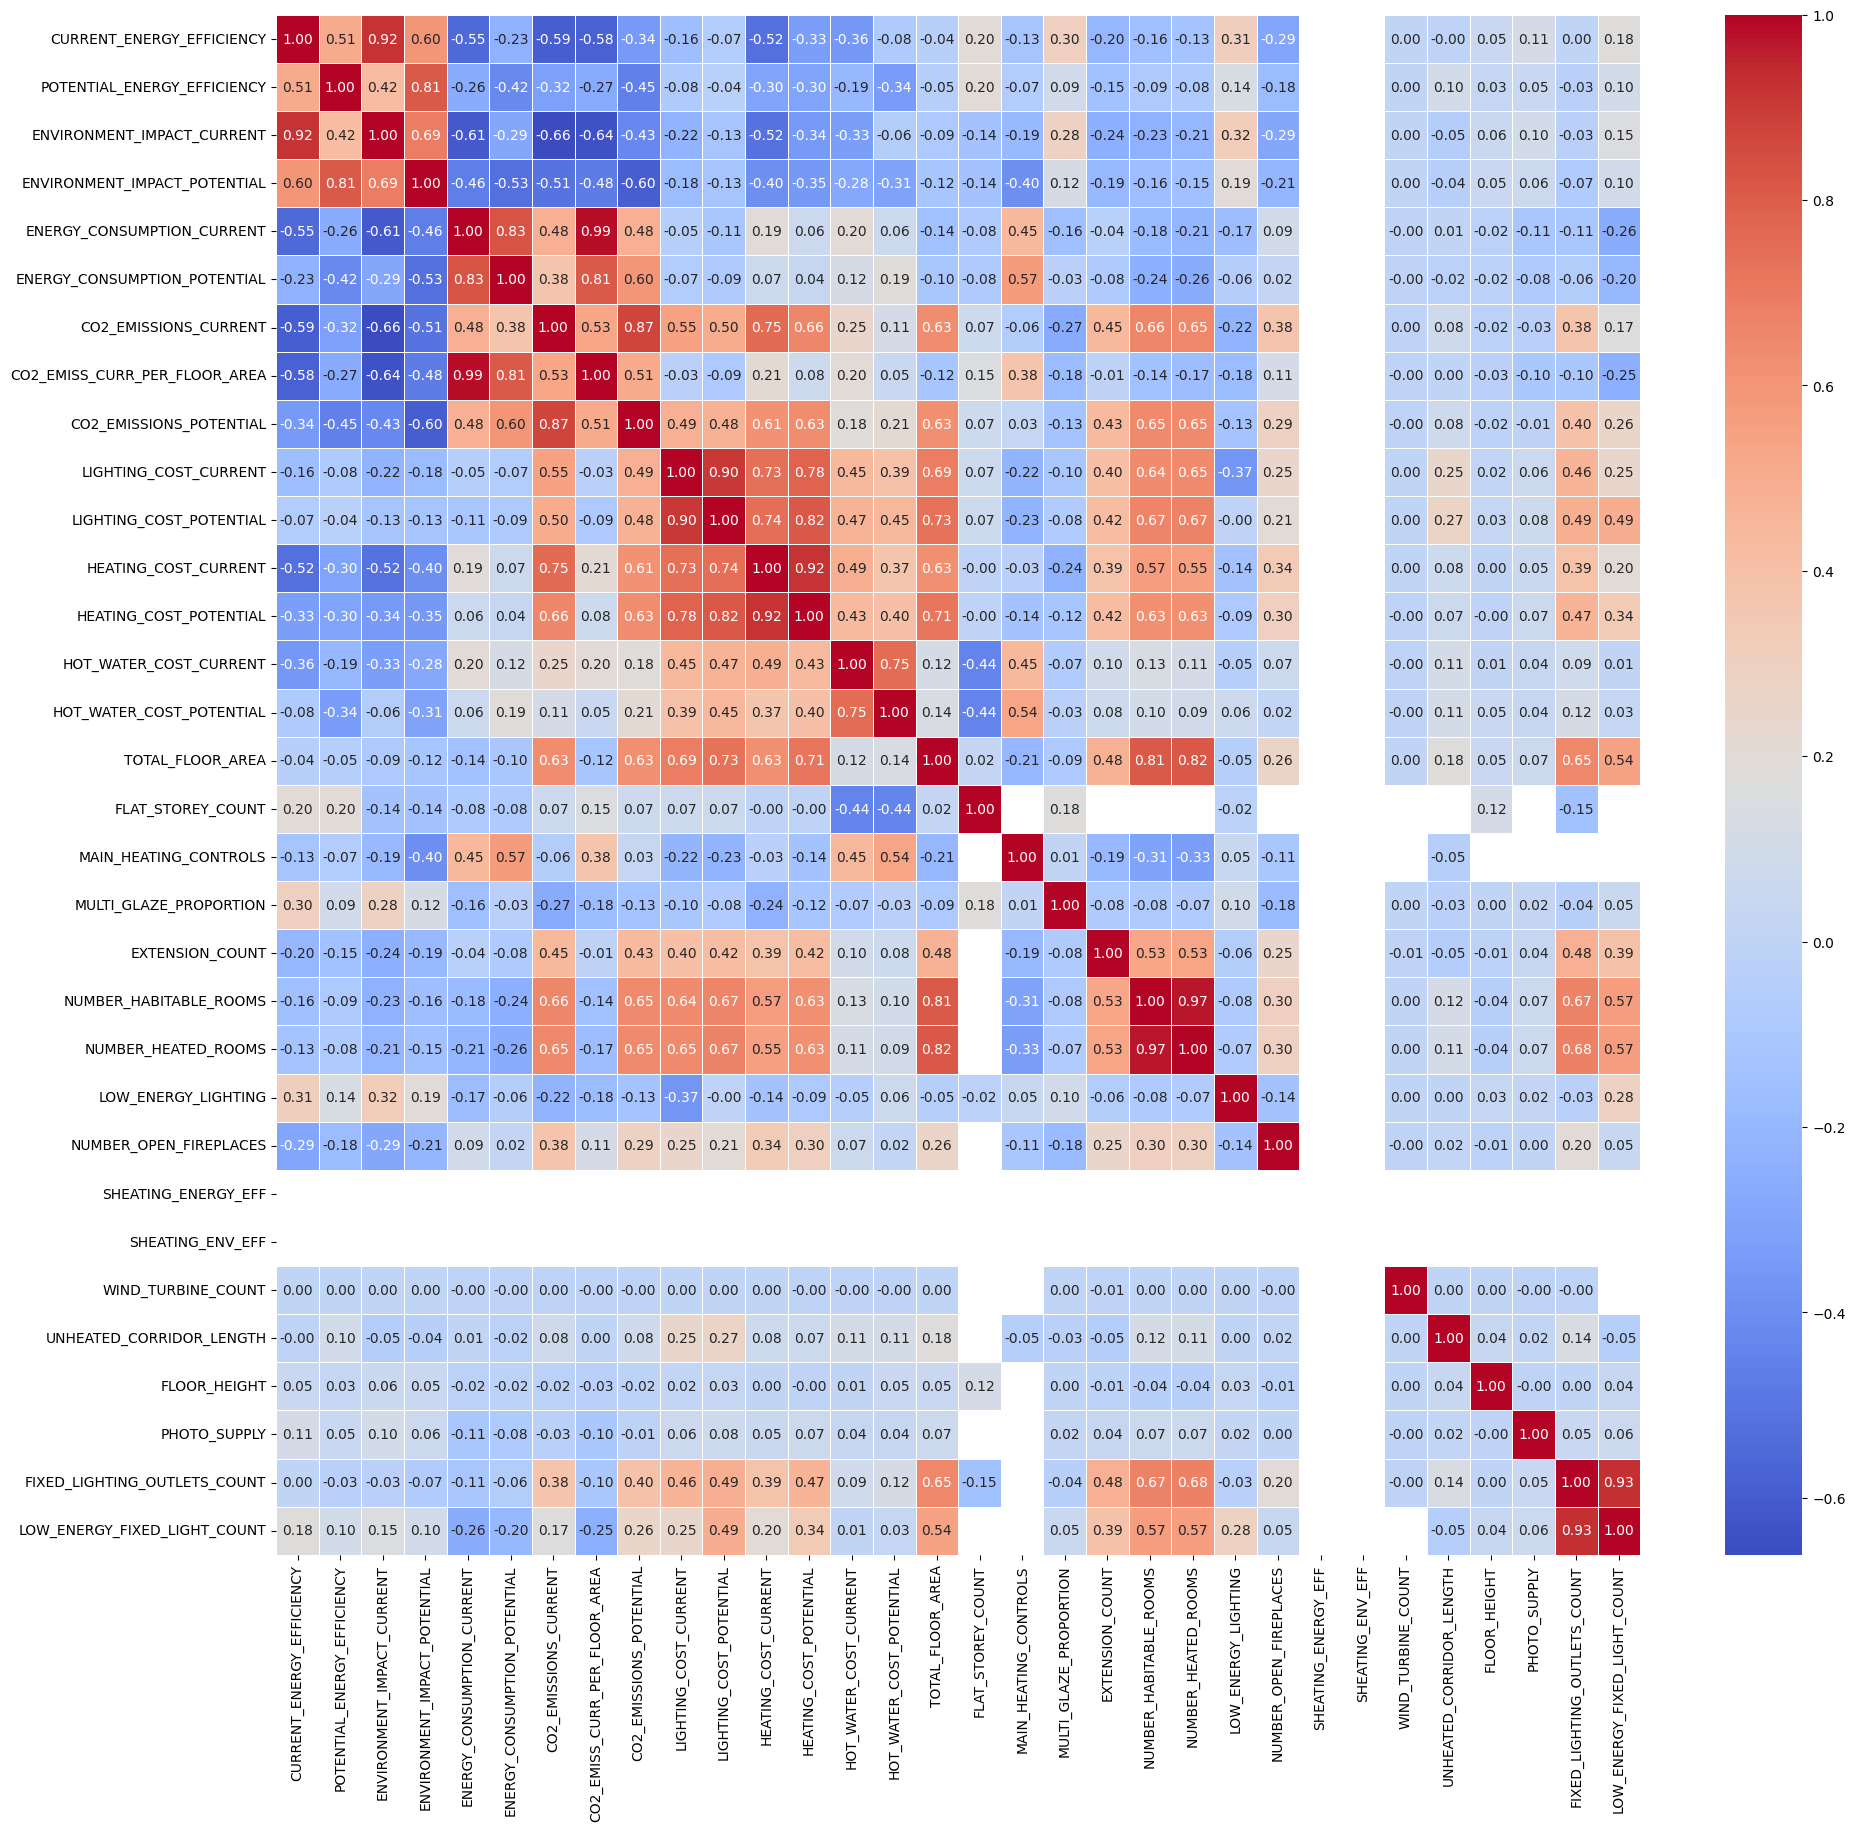

In [17]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Plot heatmap to visualize correlations
plt.figure(figsize=(22, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()